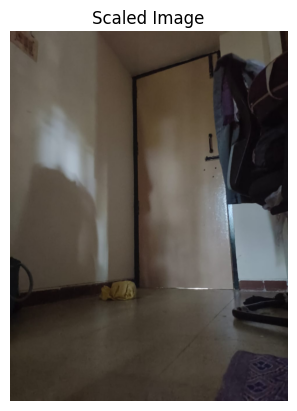

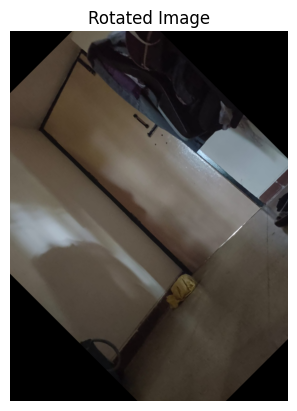

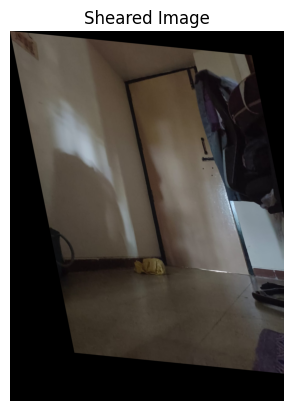

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('imag1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display in Matplotlib

# Function to display images
def show_image(title, img):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Scaling
scale_factor_x, scale_factor_y = 1.5, 1.5  # Scaling factors along x and y axes
scaled_image = cv2.resize(image, None, fx=scale_factor_x, fy=scale_factor_y, interpolation=cv2.INTER_LINEAR)
show_image("Scaled Image", scaled_image)

# 2. Rotation
height, width = image.shape[:2]
center = (width // 2, height // 2)
angle = 45  # Rotate by 45 degrees
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)  # No scaling during rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
show_image("Rotated Image", rotated_image)

# 3. Shearing
# Shear by a factor along x-axis and y-axis
shear_factor_x, shear_factor_y = 0.2, 0.1
shear_matrix = np.array([[1, shear_factor_x, 0],
                         [shear_factor_y, 1, 0]], dtype=np.float32)

# Calculate new dimensions to accommodate the sheared image
new_width = int(width + abs(shear_factor_y * height))
new_height = int(height + abs(shear_factor_x * width))
sheared_image = cv2.warpAffine(image, shear_matrix, (new_width, new_height))
show_image("Sheared Image", sheared_image)


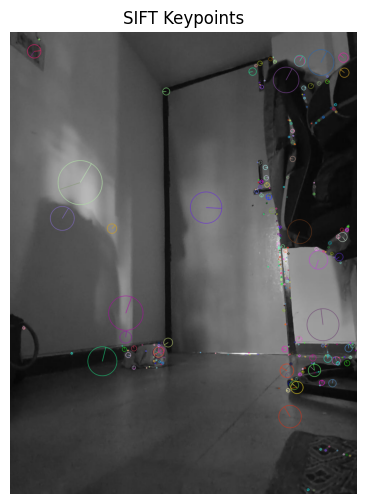

Number of keypoints detected: 325
Keypoint Coordinates (x, y):
Keypoint 1: (37.701717376708984, 819.0487670898438)
Keypoint 2: (38.01205825805664, 820.0615234375)
Keypoint 3: (66.5277328491211, 53.11986541748047)
Keypoint 4: (66.5277328491211, 53.11986541748047)
Keypoint 5: (79.99593353271484, 20.14950180053711)

Orientation of keypoints:
Keypoint 1: Orientation = 16.7890625 degrees
Keypoint 2: Orientation = 17.43157958984375 degrees
Keypoint 3: Orientation = 124.60983276367188 degrees
Keypoint 4: Orientation = 353.9632873535156 degrees
Keypoint 5: Orientation = 324.6125183105469 degrees

Descriptor of first keypoint:
[ 16.  62.  53.   0.   0.   0.   0.   1.  16. 136.  66.   0.   0.   0.
   2.   6.   1. 127. 120.   0.   0.   1.   3.   2.   0.  87.  46.   0.
   0.   0.   0.   0.  27.  12.  10.   3.   1.   0.   0.   4. 134.  35.
  14.   0.   0.   9.  46. 105.  12.  59.  43.   0.   0. 101. 119.  26.
   0. 136.  64.   0.   0.  50.  22.   0.  49.   3.   2.   4.   1.   0.
   0.   3. 136.  36

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('imag1.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# 1. Constructing a Scale Space
# Detect SIFT features and compute descriptors
# (Scale space construction is handled internally by the SIFT algorithm)
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw keypoints for visualization
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display original image with keypoints
plt.figure(figsize=(10, 6))
plt.imshow(image_with_keypoints, cmap='gray')
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()

# 2. Key Point Localization
# Display number of keypoints detected
print(f"Number of keypoints detected: {len(keypoints)}")

# Print the coordinates of some keypoints (up to 5 for illustration)
print("Keypoint Coordinates (x, y):")
for i, kp in enumerate(keypoints[:5]):
    print(f"Keypoint {i+1}: ({kp.pt[0]}, {kp.pt[1]})")

# 3. Orientation Assignment
# Each keypoint has an angle attribute representing the orientation
print("\nOrientation of keypoints:")
for i, kp in enumerate(keypoints[:5]):
    print(f"Keypoint {i+1}: Orientation = {kp.angle} degrees")

# 4. Key Point Descriptor
# Each keypoint has a descriptor that is a vector describing the neighborhood
# Display the descriptor of the first keypoint as an example
print("\nDescriptor of first keypoint:")
print(descriptors[0])

# Number of features per descriptor vector
print(f"\nLength of each descriptor vector: {descriptors.shape[1]}")
